# Importing Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Pipelining and Preprocessing

Note: Train with other type of data also

In [94]:
from tensorflow.keras.preprocessing import image
import tensorflow as tf

import numpy as np

from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import os
import time

from matplotlib import pyplot as plt
from IPython import display
from tqdm import tqdm


Using Dataset_2 as the main training data for results

In [3]:
PATH = '/content/drive/My Drive/COVID-19_Project/Classification_of_Medical_Images/Final_Dataset_Augmented_and_mirror_all_new/'

In [4]:
IMG_WIDTH = 224
IMG_HEIGHT = 224

In [5]:
data_dir_list = os.listdir(PATH)
data_dir_list

['Covid-19', 'Normal', 'Pneumonia']

In [6]:
img_data_list = []
image_path_list = []

In [7]:
for dataset in data_dir_list:
    img_list = os.listdir(PATH+dataset+'/')
    print('Loading the images of dataset - '+ '{}\n'.format(dataset))
    count = 0
    for img in tqdm(img_list):
        img_path = PATH+dataset+'/'+img
        image_path_list.append(img_path)
        img = image.load_img(img_path, target_size=(IMG_WIDTH,IMG_HEIGHT))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        img_data_list.append(x)
        count = count+1
        if count == 800:
          # otherwise make 700-700 divisions
          break

  0%|          | 0/1000 [00:00<?, ?it/s]

Loading the images of dataset - Covid-19



  0%|          | 0/1000 [00:00<?, ?it/s]

Loading the images of dataset - Normal




 80%|███████▉  | 799/1000 [03:37<01:11,  2.83it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Loading the images of dataset - Pneumonia





  0%|          | 1/1000 [00:00<04:04,  4.08it/s]

  0%|          | 2/1000 [00:00<03:53,  4.27it/s]

  0%|          | 3/1000 [00:00<04:12,  3.94it/s]

  0%|          | 4/1000 [00:01<04:33,  3.64it/s]

  0%|          | 5/1000 [00:01<04:20,  3.81it/s]

  1%|          | 6/1000 [00:01<04:09,  3.99it/s]

  1%|          | 7/1000 [00:01<04:07,  4.01it/s]

  1%|          | 8/1000 [00:01<03:55,  4.20it/s]

  1%|          | 9/1000 [00:02<03:50,  4.29it/s]

  1%|          | 10/1000 [00:02<03:40,  4.49it/s]

  1%|          | 11/1000 [00:02<03:41,  4.47it/s]

  1%|          | 12/1000 [00:02<03:48,  4.32it/s]

  1%|▏         | 13/1000 [00:03<03:48,  4.32it/s]

  1%|▏         | 14/1000 [00:03<03:57,  4.15it/s]

  2%|▏         | 15/1000 [00:03<03:52,  4.24it/s]

  2%|▏         | 16/1000 [00:03<03:52,  4.22it/s]

  2%|▏         | 17/1000 [00:04<03:42,  4.42it/s]

  2%|▏         | 18/1000 [00:04<03:40,  4.45it/s]

  2%|▏         | 19/1000 [00:04<03:46,  4.33it/s]

  2%|▏         | 20/1000 [00:04<03:56,

In [8]:
img_data = np.array(img_data_list)
img_data = np.rollaxis(img_data,1,0)
img_data = img_data[0]
img_data = img_data.astype('int32')
img_data = np.abs(img_data)
print(img_data.shape)

(2400, 224, 224, 3)


In [9]:
len(image_path_list)

2400

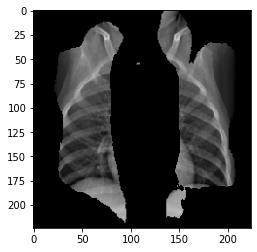

In [10]:
plt.imshow(img_data[1000])

In [11]:
img_data.dtype

dtype('int32')

# Neural Network Training

Note: use other networks also

## Data Preprocessing 

In [12]:
num_classes = 3
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples), dtype = 'int32')

In [13]:
labels[:800] = 0
labels[800:1600] = 1
labels[1600:] = 2

names = ['Covid-19', 'Normal', 'Pneumonia']

In [14]:
labels.shape

(2400,)

In [15]:
Y = np_utils.to_categorical(labels, num_classes)

x,y = shuffle(img_data,Y, random_state=2)

#X_model, X_test,Y_model, Y_test = train_test_split(x, y, test_size = 0.1, random_state = 2)

X_train_NN, X_test_NN, y_train_NN, y_test_NN = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [16]:
X_test_NN.shape

(480, 224, 224, 3)

In [17]:
X_train_NN.shape

(1920, 224, 224, 3)

In [18]:
y_train_NN.shape

(1920, 3)

## Training

90

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

# shape 224, 224, 3

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (224, 224, 3), activation = 'relu', kernel_initializer='random_normal'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu', kernel_initializer='random_normal'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a third convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu', kernel_initializer='random_normal'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a forth convolutional layer
classifier.add(Conv2D(64, (3, 3), activation = 'relu', kernel_initializer='random_normal'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a forth convolutional layer
classifier.add(Conv2D(64, (3, 3), activation = 'relu', kernel_initializer='random_normal'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a forth convolutional layer
classifier.add(Conv2D(64, (3, 3), activation = 'relu', kernel_initializer='random_normal'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu', kernel_initializer='random_normal'))
classifier.add(Dense(units = 128, activation = 'relu', kernel_initializer='random_normal'))
classifier.add(Dense(units = 128, activation = 'relu', kernel_initializer='random_normal'))
classifier.add(Dense(units = 3, activation = 'softmax', kernel_initializer='random_normal'))

In [20]:
opt = tf.keras.optimizers.Adam(
    learning_rate=0.001
)

In [21]:
classifier.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics=['accuracy'])

In [22]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        1

In [23]:
callbacks = [
    #tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss'),
    #tf.keras.callbacks.TensorBoard(log_dir='logs\{}'.format(NAME)),
    tf.keras.callbacks.ModelCheckpoint('Simple_model.h5', save_best_only=True),
    tf.keras.callbacks.ReduceLROnPlateau()]

In [24]:
classifier.fit(X_train_NN, y_train_NN, batch_size=32, epochs=100, verbose=1, validation_data = (X_test_NN, y_test_NN), callbacks = callbacks)

Epoch 1/100
60/60 [==============================] - 2s 41ms/step - loss: 0.7848 - accuracy: 0.6531 - val_loss: 0.5671 - val_accuracy: 0.7833
Epoch 2/100
60/60 [==============================] - 2s 38ms/step - loss: 0.4242 - accuracy: 0.8365 - val_loss: 0.2684 - val_accuracy: 0.8875
Epoch 3/100
60/60 [==============================] - 2s 38ms/step - loss: 0.3559 - accuracy: 0.8620 - val_loss: 0.2761 - val_accuracy: 0.9021
Epoch 4/100
60/60 [==============================] - 2s 37ms/step - loss: 0.2804 - accuracy: 0.8974 - val_loss: 0.5241 - val_accuracy: 0.8333
Epoch 5/100
60/60 [==============================] - 2s 38ms/step - loss: 0.2624 - accuracy: 0.8984 - val_loss: 0.2192 - val_accuracy: 0.9042
Epoch 6/100
60/60 [==============================] - 2s 38ms/step - loss: 0.2027 - accuracy: 0.9240 - val_loss: 0.2755 - val_accuracy: 0.8833
Epoch 7/100
60/60 [==============================] - 2s 38ms/step - loss: 0.1839 - accuracy: 0.9271 - val_loss: 0.2872 - val_accuracy: 0.9042
Epoch 

In [ ]:
classifier = tf.keras.models.load_model("Simple_model.h5")

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred = classifier.predict(X_test_NN)
y_p = np.argmax(y_pred,axis=1)
y_true = np.argmax(y_test_NN,axis=1)
print('confusion matrix')
print(confusion_matrix(y_true,y_p))

confusion matrix
[[159   1   1]
 [  3 160   4]
 [  8  16 128]]


In [ ]:
print('Classification report')
print(classification_report(y_true,y_p))

Classification report
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       161
           1       0.90      0.96      0.93       167
           2       0.96      0.84      0.90       152

    accuracy                           0.93       480
   macro avg       0.93      0.93      0.93       480
weighted avg       0.93      0.93      0.93       480



###Testing the model with ML techniques

In [ ]:
classifier = tf.keras.models.load_model("Simple_model.h5")

In [ ]:
from tensorflow.keras.models import Model

op_layer = classifier.get_layer('dense_2').output
Model_new = Model(inputs = classifier.input , outputs = op_layer)

In [ ]:
Model_new.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 32)       

In [ ]:
x_new,y_new = shuffle(img_data,labels, random_state=2)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(x_new, y_new, test_size = 0.1, random_state = 2)

In [ ]:
train_new = Model_new.predict(X_train_1)
test_new = Model_new.predict(X_test_1)
print(test_new)

[[0.         0.         0.         ... 8.574608   0.         0.        ]
 [0.         0.         0.         ... 1.5503093  0.         0.        ]
 [0.         0.         0.         ... 1.0225704  0.         0.        ]
 ...
 [2.743296   0.         0.         ... 0.15541951 0.         0.        ]
 [0.         0.         0.         ... 6.65729    0.         0.        ]
 [6.4004273  0.         0.         ... 0.         0.         3.421207  ]]


In [ ]:
test_new.shape

(240, 128)

#### svm

94 and 90

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', max_iter = 50000)

svm.fit(train_new,y_train_1)
print('fitting done !!!')
svm.score(train_new,y_train_1)

fitting done !!!


0.986574074074074

fc3

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = svm.predict(test_new)
y_true = y_test_1
print(confusion_matrix(y_true,y_pred))
print(classification_report(y_true,y_pred))

[[81  1  1]
 [ 0 85  8]
 [ 1  3 60]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        83
           1       0.96      0.91      0.93        93
           2       0.87      0.94      0.90        64

    accuracy                           0.94       240
   macro avg       0.94      0.94      0.94       240
weighted avg       0.94      0.94      0.94       240



#### xg_boost

92 and 91

In [ ]:
import xgboost as xgb

xb = xgb.XGBClassifier(max_iter = 50000)

xb.fit(train_new,y_train_1)

print('fitting done !!!')

xb.score(train_new,y_train_1)

fitting done !!!


1.0

fc3

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = xb.predict(test_new)
y_true = y_test_1
print(confusion_matrix(y_true,y_pred))
print(classification_report(y_true,y_pred))

[[81  1  1]
 [ 0 87  6]
 [ 1  3 60]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        83
           1       0.96      0.94      0.95        93
           2       0.90      0.94      0.92        64

    accuracy                           0.95       240
   macro avg       0.95      0.95      0.95       240
weighted avg       0.95      0.95      0.95       240



#### random forest

93 and 90

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=2000)
rf.fit(train_new,y_train_1)

print('fitting done !!!')

rf.score(train_new,y_train_1)

fitting done !!!


1.0

fc3

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = rf.predict(test_new)
y_true = y_test_1
print(confusion_matrix(y_true,y_pred))
print(classification_report(y_true,y_pred))

[[81  1  1]
 [ 0 85  8]
 [ 1  3 60]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        83
           1       0.96      0.91      0.93        93
           2       0.87      0.94      0.90        64

    accuracy                           0.94       240
   macro avg       0.94      0.94      0.94       240
weighted avg       0.94      0.94      0.94       240



# Descriptors Extraction and Training

## Preprocessing the Data

In [ ]:
! pip install opencv-python==3.4.2.16
! pip install opencv-contrib-python==3.4.2.16

Using: SIFT

In [ ]:
import cv2

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()
des_list = []

In [ ]:
for i in tqdm(range(len(img_data))):
  img = img_data[i].copy()
  img = np.uint8(img)
  #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  kpts, des = sift.detectAndCompute(img, None)
  des_list.append((i, des))

100%|██████████| 2400/2400 [00:43<00:00, 54.85it/s]


In [ ]:
image = cv2.drawKeypoints(image=img, outImage=img, keypoints=kpts, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

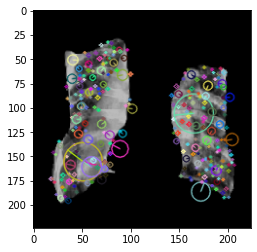

In [ ]:
plt.imshow(image)
plt.show()

Using BRISK

In [25]:
import cv2

In [26]:
brisk = cv2.BRISK_create(50)
des_list = []

In [27]:
for i in tqdm(range(len(img_data))):
  img = img_data[i].copy()
  img = np.uint8(img)
  #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  kpts, des = brisk.detectAndCompute(img, None)
  des_list.append((i, des))




  0%|          | 0/2400 [00:00<?, ?it/s]


  1%|          | 18/2400 [00:00<00:13, 176.79it/s]


  2%|▏         | 38/2400 [00:00<00:13, 181.59it/s]


  3%|▎         | 63/2400 [00:00<00:11, 196.95it/s]


  4%|▍         | 91/2400 [00:00<00:10, 214.40it/s]


  5%|▍         | 119/2400 [00:00<00:09, 230.21it/s]


  6%|▌         | 145/2400 [00:00<00:09, 231.68it/s]


  7%|▋         | 167/2400 [00:00<00:10, 222.18it/s]


  8%|▊         | 190/2400 [00:00<00:09, 222.94it/s]


  9%|▉         | 212/2400 [00:00<00:09, 221.98it/s]


 10%|▉         | 236/2400 [00:01<00:09, 222.00it/s]


 11%|█         | 261/2400 [00:01<00:09, 228.99it/s]


 12%|█▏        | 284/2400 [00:01<00:09, 214.61it/s]


 13%|█▎        | 310/2400 [00:01<00:09, 223.11it/s]


 14%|█▍        | 338/2400 [00:01<00:08, 237.05it/s]


 15%|█▌        | 365/2400 [00:01<00:08, 245.03it/s]


 16%|█▋        | 392/2400 [00:01<00:08, 248.37it/s]


 17%|█▋        | 418/2400 [00:01<00:08, 226.86it/s]


 18%|█▊        | 442/2400 [00:01<00:08, 

In [28]:
image = cv2.drawKeypoints(image=img, outImage=img, keypoints=kpts, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

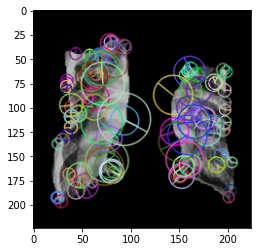

In [29]:
plt.imshow(image)
plt.show()

stacking all the descriptors vertically in a numpy array

In [30]:
descriptors = des_list[0][1]
for img_no, descriptor in tqdm(des_list[:]):
  try:
    descriptors = np.vstack((descriptors, descriptor))
  except:
    continue




  0%|          | 0/2400 [00:00<?, ?it/s]


 14%|█▍        | 341/2400 [00:00<00:00, 3398.89it/s]


 21%|██        | 509/2400 [00:00<00:00, 2600.09it/s]


 27%|██▋       | 639/2400 [00:00<00:00, 1997.71it/s]


 32%|███▏      | 764/2400 [00:00<00:01, 1635.81it/s]


 37%|███▋      | 886/2400 [00:00<00:01, 1381.19it/s]


 42%|████▏     | 1002/2400 [00:00<00:01, 1222.03it/s]


 46%|████▋     | 1112/2400 [00:00<00:01, 1107.54it/s]


 51%|█████     | 1217/2400 [00:00<00:01, 1000.97it/s]


 55%|█████▍    | 1315/2400 [00:01<00:01, 931.29it/s] 


 59%|█████▊    | 1408/2400 [00:01<00:01, 876.74it/s]


 62%|██████▏   | 1496/2400 [00:01<00:01, 835.33it/s]


 66%|██████▌   | 1580/2400 [00:01<00:01, 801.57it/s]


 69%|██████▉   | 1661/2400 [00:01<00:00, 759.07it/s]


 72%|███████▏  | 1738/2400 [00:01<00:00, 740.98it/s]


 76%|███████▌  | 1813/2400 [00:01<00:00, 716.30it/s]


 79%|███████▊  | 1886/2400 [00:01<00:00, 689.16it/s]


 82%|████████▏ | 1956/2400 [00:01<00:00, 663.77it/s]


 84%|████████▍ 

In [31]:
descriptors_float = descriptors.astype(float)

Clustring using k means

Note: use others methods also

In [32]:
from scipy.cluster.vq import kmeans, vq
# we can change the value of k (no of clusters) to see the different accuracies
k = 128
voc, variance = kmeans(descriptors_float, k, 1)

calculating the histogram of the features and representing them as vectors.

vq(vector quantization) Assigns codes from a code book to observations.

In [33]:
im_features = np.zeros((len(img_data), k), "float32")
for i in tqdm(range(len(img_data))):
  try:
    words, distance = vq(des_list[i][1],voc)
    for w in words:
      im_features[i][w] += 1
  except:
    continue 




  0%|          | 0/2400 [00:00<?, ?it/s]


  3%|▎         | 79/2400 [00:00<00:02, 783.93it/s]


  7%|▋         | 163/2400 [00:00<00:02, 798.78it/s]


 10%|▉         | 236/2400 [00:00<00:02, 776.51it/s]


 13%|█▎        | 305/2400 [00:00<00:02, 745.04it/s]


 16%|█▋        | 395/2400 [00:00<00:02, 784.89it/s]


 19%|█▉        | 462/2400 [00:00<00:02, 746.44it/s]


 24%|██▎       | 564/2400 [00:00<00:02, 811.68it/s]


 29%|██▉       | 702/2400 [00:00<00:01, 925.33it/s]


 34%|███▎      | 804/2400 [00:00<00:01, 950.64it/s]


 38%|███▊      | 902/2400 [00:01<00:01, 956.35it/s]


 42%|████▏     | 1019/2400 [00:01<00:01, 1011.43it/s]


 47%|████▋     | 1132/2400 [00:01<00:01, 1042.55it/s]


 52%|█████▏    | 1241/2400 [00:01<00:01, 1054.99it/s]


 58%|█████▊    | 1393/2400 [00:01<00:00, 1161.12it/s]


 68%|██████▊   | 1632/2400 [00:01<00:00, 1371.97it/s]


 74%|███████▍  | 1788/2400 [00:01<00:00, 1318.28it/s]


 81%|████████  | 1934/2400 [00:01<00:00, 1250.12it/s]


 86%|████████▋ | 2076/2

performing Tf-Idf vectorization

In [34]:
nbr_occurances = np.sum((im_features > 0) * 1, axis = 0)
idf = np.array(np.log((1.0*len(img_data) + 1) / (1.0*nbr_occurances + 1)), "float32")

Scaling the words

Standardize features by removing the mean and scaling to unit variance

In a way normalizarion

In [35]:
from sklearn.preprocessing import StandardScaler
stdSlr = StandardScaler().fit(im_features)
im_features = stdSlr.transform(im_features)

In [36]:
im_features.shape

(2400, 128)

In [37]:
im_features.dtype

dtype('float32')

## Train and Test spliting 

In [ ]:
num_classes = 3
num_of_samples = im_features.shape[0]
labels = np.ones((num_of_samples), dtype = 'int32')

labels[:800] = 0
labels[800:1600] = 1
labels[1600:] = 2

names = ['Covid-19', 'Normal', 'Pneumonia']

In [ ]:
x,y = shuffle(im_features,labels, random_state=2)

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(x, y, test_size = 0.15, random_state = 2)

In [ ]:
X_train_d.shape

(2040, 128)

In [ ]:
y_train_d.shape

(2040,)

## Training with SIFT

### Training on SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC(max_iter = 50000)
svm.fit(X_train_d, y_train_d)
print('fitting done !!!')

fitting done !!!


In [ ]:
svm.score(X_train_d,y_train_d)

0.9465686274509804

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = svm.predict(X_test_d)
y_true = y_test_d
print(confusion_matrix(y_true,y_pred))
print(classification_report(y_true,y_pred))

[[103   2  13]
 [  0 119  18]
 [ 13   6  86]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       118
           1       0.94      0.87      0.90       137
           2       0.74      0.82      0.77       105

    accuracy                           0.86       360
   macro avg       0.85      0.85      0.85       360
weighted avg       0.86      0.86      0.86       360



### Training on XG_boost

In [ ]:
import xgboost as xgb

xb = xgb.XGBClassifier(max_iter = 50000)

xb.fit(X_train_d,y_train_d)

print('fitting done !!!')

fitting done !!!


In [ ]:
xb.score(X_train_d,y_train_d)

0.9362745098039216

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = xb.predict(X_test_d)
y_true = y_test_d
print(confusion_matrix(y_true,y_pred))
print(classification_report(y_true,y_pred))

[[101   1  16]
 [  0 114  23]
 [ 11   8  86]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       118
           1       0.93      0.83      0.88       137
           2       0.69      0.82      0.75       105

    accuracy                           0.84       360
   macro avg       0.84      0.84      0.83       360
weighted avg       0.85      0.84      0.84       360



### Training on Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=1000)
rf.fit(X_train_d,y_train_d)

print('fitting done !!!')

fitting done !!!


In [ ]:
rf.score(X_train_d,y_train_d)

1.0

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = rf.predict(X_test_d)
y_true = y_test_d
print(confusion_matrix(y_true,y_pred))
print(classification_report(y_true,y_pred))

[[ 95   2  21]
 [  0 121  16]
 [ 12  10  83]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.84       118
           1       0.91      0.88      0.90       137
           2       0.69      0.79      0.74       105

    accuracy                           0.83       360
   macro avg       0.83      0.83      0.83       360
weighted avg       0.84      0.83      0.83       360



## Training with BRISK

### Training on SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC(max_iter = 50000)
svm.fit(X_train_d, y_train_d)
print('fitting done !!!')

fitting done !!!


In [ ]:
svm.score(X_train_d,y_train_d)

0.8803921568627451

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = svm.predict(X_test_d)
y_true = y_test_d
print(confusion_matrix(y_true,y_pred))
print(classification_report(y_true,y_pred))

[[ 81  13  24]
 [  2 106  29]
 [ 13  11  81]]
              precision    recall  f1-score   support

           0       0.84      0.69      0.76       118
           1       0.82      0.77      0.79       137
           2       0.60      0.77      0.68       105

    accuracy                           0.74       360
   macro avg       0.75      0.74      0.74       360
weighted avg       0.76      0.74      0.75       360



### Training on XG_boost

In [ ]:
import xgboost as xgb

xb = xgb.XGBClassifier(max_iter = 50000)

xb.fit(X_train_d,y_train_d)

print('fitting done !!!')

fitting done !!!


In [ ]:
xb.score(X_train_d,y_train_d)

0.8602941176470589

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = xb.predict(X_test_d)
y_true = y_test_d
print(confusion_matrix(y_true,y_pred))
print(classification_report(y_true,y_pred))

[[ 81   9  28]
 [  0 104  33]
 [ 13  17  75]]
              precision    recall  f1-score   support

           0       0.86      0.69      0.76       118
           1       0.80      0.76      0.78       137
           2       0.55      0.71      0.62       105

    accuracy                           0.72       360
   macro avg       0.74      0.72      0.72       360
weighted avg       0.75      0.72      0.73       360



### Training on Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=1000)
rf.fit(X_train_d,y_train_d)

print('fitting done !!!')

fitting done !!!


In [ ]:
rf.score(X_train_d,y_train_d)

1.0

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = rf.predict(X_test_d)
y_true = y_test_d
print(confusion_matrix(y_true,y_pred))
print(classification_report(y_true,y_pred))

[[ 83   6  29]
 [  1 106  30]
 [ 13  20  72]]
              precision    recall  f1-score   support

           0       0.86      0.70      0.77       118
           1       0.80      0.77      0.79       137
           2       0.55      0.69      0.61       105

    accuracy                           0.73       360
   macro avg       0.74      0.72      0.72       360
weighted avg       0.75      0.72      0.73       360



# Combining all the Processes

In [38]:
import tensorflow as tf

In [39]:
Model_s = tf.keras.models.load_model("Simple_model.h5")

In [40]:
from tensorflow.keras.models import Model

op_layer = Model_s.get_layer('dense_2').output
Model_C = Model(inputs = Model_s.input , outputs = op_layer)

In [41]:
Model_C.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 32)       

In [42]:
Pred_fc3 = Model_C.predict(img_data)

In [43]:
Pred_fc3.shape

(2400, 128)

In [44]:
Pred_fc3.dtype

dtype('float32')

In [45]:
type(Pred_fc3)

numpy.ndarray

also using the extracted features using opencv

In [46]:
im_features.shape

(2400, 128)

In [47]:
im_features.dtype

dtype('float32')

In [48]:
type(im_features)

numpy.ndarray

combining the data from pred_fc3 and im_features

In [49]:
total_features = 256

In [50]:
total_dataset = 2400

In [51]:
feature_data = np.zeros((total_dataset, total_features), dtype = 'float32')

In [52]:
feature_data.shape

(2400, 256)

In [53]:
for i in tqdm(range(len(feature_data))):
  cv_feature = im_features[i]
  model_feature = Pred_fc3[i]
  feature_data[i] = np.concatenate((cv_feature,model_feature))




100%|██████████| 2400/2400 [00:00<00:00, 153973.56it/s]


In [54]:
feature_data

array([[-0.7401196 ,  2.3749826 ,  1.6110097 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.7401196 ,  3.376029  , -0.64083844, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.3015896 , -0.62815666,  1.6110097 , ...,  0.        ,
         0.13638587,  0.        ],
       ...,
       [-0.7401196 , -0.62815666, -0.64083844, ...,  0.        ,
         3.58832   ,  0.        ],
       [ 0.6210199 , -0.62815666, -0.64083844, ...,  0.        ,
         3.0733333 ,  0.        ],
       [-0.7401196 , -0.62815666,  0.86039364, ...,  0.        ,
         2.1449747 ,  0.        ]], dtype=float32)

Train Test split

change accordance to the type of training

In [55]:
num_classes = 3
num_of_samples = feature_data.shape[0]
labels = np.ones((num_of_samples), dtype = 'int32')

labels[:800] = 0
labels[800:1600] = 1
labels[1600:] = 2

names = ['Covid-19', 'Normal', 'Pneumonia']

Use Different Train Test Splitting --> 0.05, 0.1, 0.2, 0.3

In [56]:
# use the following line training the Deep learning Model
Y = np_utils.to_categorical(labels, num_classes)

x,y = shuffle(feature_data,Y, random_state=2)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [57]:
X_train_c.shape

(1920, 256)

In [58]:
y_train_c.shape

(1920, 3)

## Training DL model

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [60]:
model_combined = Sequential()
model_combined.add(Dense(1024, input_dim=256, activation='relu', name='dense_1'))
model_combined.add(Dense(800, activation='relu', name='dense_2'))
model_combined.add(Dense(512, activation='relu', name='dense_3'))
model_combined.add(Dense(300, activation='relu', name='dense_4'))
model_combined.add(Dense(256, activation='relu', name='dense_5'))
model_combined.add(Dense(128, activation='relu', name='dense_6'))
model_combined.add(Dense(3, activation='softmax', name = 'output_layer'))

In [61]:
opt = tf.keras.optimizers.Adam(
    learning_rate=0.001
)

In [62]:
model_combined.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics=['accuracy'])

make wider, make deeper, make wider and deeper, and also use other methods

In [63]:
model_combined.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              263168    
_________________________________________________________________
dense_2 (Dense)              (None, 800)               820000    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               410112    
_________________________________________________________________
dense_4 (Dense)              (None, 300)               153900    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               77056     
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
output_layer (Dense)         (None, 3)                

In [64]:
callbacks = [
    #tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss'),
    #tf.keras.callbacks.TensorBoard(log_dir='logs\{}'.format(NAME)),
    tf.keras.callbacks.ModelCheckpoint('Simple_model_combined_BRISK.h5', save_best_only=True),
    tf.keras.callbacks.ReduceLROnPlateau()]

In [65]:
model_combined.fit(X_train_c, y_train_c, batch_size=32, epochs=100, verbose=1, validation_data = (X_test_c, y_test_c), callbacks = callbacks)

Epoch 1/100
60/60 [==============================] - 0s 6ms/step - loss: 0.1313 - accuracy: 0.9646 - val_loss: 0.3869 - val_accuracy: 0.9312
Epoch 2/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 0.9885 - val_loss: 0.4185 - val_accuracy: 0.9333
Epoch 3/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0192 - accuracy: 0.9937 - val_loss: 0.8578 - val_accuracy: 0.9208
Epoch 4/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0121 - accuracy: 0.9937 - val_loss: 0.6364 - val_accuracy: 0.9354
Epoch 5/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0202 - accuracy: 0.9943 - val_loss: 0.8354 - val_accuracy: 0.9312
Epoch 6/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0091 - accuracy: 0.9984 - val_loss: 0.9170 - val_accuracy: 0.9521
Epoch 7/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.9937 - val_loss: 0.4923 - val_accuracy: 0.9458
Epoch 8/100
6

In [66]:
Model_n = tf.keras.models.load_model("Simple_model_combined_BRISK.h5")

In [67]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred = Model_n.predict(X_test_c)
y_p = np.argmax(y_pred,axis=1)
y_true = np.argmax(y_test_c,axis=1)
print('confusion matrix')
print(confusion_matrix(y_true,y_p))

confusion matrix
[[155   3   3]
 [  0 155  12]
 [  9   6 137]]


In [68]:
print('Classification report')
print(classification_report(y_true,y_p))

Classification report
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       161
           1       0.95      0.93      0.94       167
           2       0.90      0.90      0.90       152

    accuracy                           0.93       480
   macro avg       0.93      0.93      0.93       480
weighted avg       0.93      0.93      0.93       480



SIFT ACCURACY was 94%

## Using ML methods

In [69]:
Model_n = tf.keras.models.load_model("Simple_model_combined_BRISK.h5")

In [70]:
from tensorflow.keras.models import Model

op_layer = Model_n.get_layer('dense_6').output
Model_csn = Model(inputs = Model_n.input , outputs = op_layer)

In [71]:
Model_csn.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1_input (InputLayer)   [(None, 256)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              263168    
_________________________________________________________________
dense_2 (Dense)              (None, 800)               820000    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               410112    
_________________________________________________________________
dense_4 (Dense)              (None, 300)               153900    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               77056     
_________________________________________________________________
dense_6 (Dense)              (None, 128)              

In [72]:
x_new,y_new = shuffle(feature_data,labels, random_state=2)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(x_new, y_new, test_size = 0.2, random_state = 2)

In [73]:
train_new = Model_csn.predict(X_train_1)
test_new = Model_csn.predict(X_test_1)
print(test_new)

[[ 3.9151003 10.326247   0.        ...  0.         0.         0.       ]
 [ 1.162923   3.4711647  0.        ...  0.         0.         0.       ]
 [ 1.0288262  3.017066   0.        ...  0.         0.         0.       ]
 ...
 [ 1.3578434  0.         0.        ...  3.5187538  0.         0.       ]
 [ 3.5916874  9.374579   0.        ...  0.         0.         0.       ]
 [ 4.2606072 11.472528   0.        ...  0.         0.         0.       ]]


###Results With SIFT - Scale Invarient Feature Transform

#### SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC(max_iter = 50000)
svm.fit(train_new, y_train_1)
print('fitting done !!!')

fitting done !!!


In [ ]:
svm.score(train_new, y_train_1)

0.9984375

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = svm.predict(test_new)
y_true = y_test_1
print(confusion_matrix(y_true,y_pred))
print(classification_report(y_true,y_pred))

[[155   1   5]
 [  1 158   8]
 [  2   9 141]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       161
           1       0.94      0.95      0.94       167
           2       0.92      0.93      0.92       152

    accuracy                           0.95       480
   macro avg       0.95      0.95      0.95       480
weighted avg       0.95      0.95      0.95       480



#### xg_boost

In [ ]:
import xgboost as xgb

xb = xgb.XGBClassifier(max_iter = 50000)

xb.fit(train_new,y_train_1)

print('fitting done !!!')

fitting done !!!


In [ ]:
xb.score(train_new,y_train_1)

1.0

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = xb.predict(test_new)
y_true = y_test_1
print(confusion_matrix(y_true,y_pred))
print(classification_report(y_true,y_pred))

[[157   1   3]
 [  3 155   9]
 [  2   9 141]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       161
           1       0.94      0.93      0.93       167
           2       0.92      0.93      0.92       152

    accuracy                           0.94       480
   macro avg       0.94      0.94      0.94       480
weighted avg       0.94      0.94      0.94       480



#### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=1000)
rf.fit(train_new,y_train_1)

print('fitting done !!!')

fitting done !!!


In [ ]:
rf.score(train_new,y_train_1)

1.0

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = rf.predict(test_new)
y_true = y_test_1
print(confusion_matrix(y_true,y_pred))
print(classification_report(y_true,y_pred))

[[155   1   5]
 [  3 156   8]
 [  2   9 141]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       161
           1       0.94      0.93      0.94       167
           2       0.92      0.93      0.92       152

    accuracy                           0.94       480
   macro avg       0.94      0.94      0.94       480
weighted avg       0.94      0.94      0.94       480



###Results With BRISK - Binary Robust Invarient Scalable Keypoints

#### SVM

In [74]:
from sklearn.svm import SVC
svm = SVC(max_iter = 50000)
svm.fit(train_new, y_train_1)
print('fitting done !!!')

fitting done !!!


In [75]:
svm.score(train_new, y_train_1)

0.9911458333333333

In [76]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = svm.predict(test_new)
y_true = y_test_1
print(confusion_matrix(y_true,y_pred))
print(classification_report(y_true,y_pred))

[[152   1   8]
 [  0 154  13]
 [  7   6 139]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       161
           1       0.96      0.92      0.94       167
           2       0.87      0.91      0.89       152

    accuracy                           0.93       480
   macro avg       0.93      0.93      0.93       480
weighted avg       0.93      0.93      0.93       480



#### xg_boost

In [77]:
import xgboost as xgb

xb = xgb.XGBClassifier(max_iter = 50000)

xb.fit(train_new,y_train_1)

print('fitting done !!!')

fitting done !!!


In [78]:
xb.score(train_new,y_train_1)

1.0

In [79]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = xb.predict(test_new)
y_true = y_test_1
print(confusion_matrix(y_true,y_pred))
print(classification_report(y_true,y_pred))

[[152   1   8]
 [  0 156  11]
 [  4   6 142]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       161
           1       0.96      0.93      0.95       167
           2       0.88      0.93      0.91       152

    accuracy                           0.94       480
   macro avg       0.94      0.94      0.94       480
weighted avg       0.94      0.94      0.94       480



#### Random forest

In [80]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=1000)
rf.fit(train_new,y_train_1)

print('fitting done !!!')

fitting done !!!


In [81]:
rf.score(train_new,y_train_1)

1.0

In [82]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = rf.predict(test_new)
y_true = y_test_1
print(confusion_matrix(y_true,y_pred))
print(classification_report(y_true,y_pred))

[[152   3   6]
 [  0 156  11]
 [  4   6 142]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       161
           1       0.95      0.93      0.94       167
           2       0.89      0.93      0.91       152

    accuracy                           0.94       480
   macro avg       0.94      0.94      0.94       480
weighted avg       0.94      0.94      0.94       480



# Testing the models

## Dataset Preprocessing

In [83]:
import tensorflow as tf
import numpy as np

In [84]:
PATH = '/content/drive/My Drive/COVID-19_Project/Classification_of_Medical_Images/Testing_Dataset/'

In [85]:
IMG_WIDTH = 224
IMG_HEIGHT = 224

In [86]:
data_dir_list = os.listdir(PATH)
data_dir_list

['Covid-19', 'Normal', 'Pneumonia']

In [87]:
img_data_list = []
image_path_list = []

In [95]:
for dataset in data_dir_list:
    img_list = os.listdir(PATH+dataset+'/')
    print('Loading the images of dataset - '+ '{}\n'.format(dataset))
    count = 0
    for img in tqdm(img_list):
        img_path = PATH+dataset+'/'+img
        image_path_list.append(img_path)
        img = image.load_img(img_path, target_size=(IMG_WIDTH,IMG_HEIGHT))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        img_data_list.append(x)
        count = count+1
        if count == 800:
          # otherwise make 700-700 divisions
          break




  0%|          | 0/91 [00:00<?, ?it/s]

Loading the images of dataset - Covid-19






  1%|          | 1/91 [00:00<00:22,  4.09it/s]


  2%|▏         | 2/91 [00:00<00:21,  4.16it/s]


  3%|▎         | 3/91 [00:00<00:20,  4.24it/s]


  4%|▍         | 4/91 [00:01<00:24,  3.53it/s]


  5%|▌         | 5/91 [00:01<00:23,  3.67it/s]


  7%|▋         | 6/91 [00:02<00:33,  2.52it/s]


  8%|▊         | 7/91 [00:02<00:28,  2.91it/s]


  9%|▉         | 8/91 [00:02<00:24,  3.35it/s]


 10%|▉         | 9/91 [00:02<00:22,  3.58it/s]


 11%|█         | 10/91 [00:02<00:21,  3.82it/s]


 12%|█▏        | 11/91 [00:03<00:19,  4.08it/s]


 13%|█▎        | 12/91 [00:03<00:18,  4.37it/s]


 14%|█▍        | 13/91 [00:03<00:17,  4.40it/s]


 15%|█▌        | 14/91 [00:03<00:18,  4.16it/s]


 16%|█▋        | 15/91 [00:03<00:17,  4.34it/s]


 18%|█▊        | 16/91 [00:04<00:17,  4.27it/s]


 19%|█▊        | 17/91 [00:04<00:18,  4.03it/s]


 20%|█▉        | 18/91 [00:04<00:17,  4.14it/s]


 21%|██        | 19/91 [00:05<00:18,  3.84it/s]


 22%|██▏       | 20/91 [00:05<00:17,  4.01it/s]


 23%|█

Loading the images of dataset - Normal






  1%|          | 1/91 [00:00<00:24,  3.68it/s]


  2%|▏         | 2/91 [00:00<00:23,  3.80it/s]


  3%|▎         | 3/91 [00:00<00:21,  4.08it/s]


  4%|▍         | 4/91 [00:00<00:20,  4.27it/s]


  5%|▌         | 5/91 [00:01<00:21,  3.98it/s]


  7%|▋         | 6/91 [00:03<01:13,  1.15it/s]


  8%|▊         | 7/91 [00:03<00:57,  1.46it/s]


  9%|▉         | 8/91 [00:03<00:45,  1.84it/s]


 10%|▉         | 9/91 [00:04<00:38,  2.14it/s]


 11%|█         | 10/91 [00:04<00:31,  2.59it/s]


 12%|█▏        | 11/91 [00:04<00:29,  2.74it/s]


 13%|█▎        | 12/91 [00:05<00:25,  3.13it/s]


 14%|█▍        | 13/91 [00:05<00:23,  3.33it/s]


 15%|█▌        | 14/91 [00:05<00:20,  3.69it/s]


 16%|█▋        | 15/91 [00:05<00:19,  3.82it/s]


 18%|█▊        | 16/91 [00:05<00:19,  3.83it/s]


 19%|█▊        | 17/91 [00:06<00:18,  3.99it/s]


 20%|█▉        | 18/91 [00:06<00:18,  3.92it/s]


 21%|██        | 19/91 [00:06<00:19,  3.70it/s]


 22%|██▏       | 20/91 [00:06<00:17,  4.00it/s]


 23%|█

Loading the images of dataset - Pneumonia






  1%|          | 1/97 [00:00<00:23,  4.17it/s]


  2%|▏         | 2/97 [00:00<00:21,  4.41it/s]


  3%|▎         | 3/97 [00:00<00:24,  3.86it/s]


  4%|▍         | 4/97 [00:00<00:22,  4.18it/s]


  5%|▌         | 5/97 [00:01<00:20,  4.48it/s]


  6%|▌         | 6/97 [00:01<00:20,  4.52it/s]


  7%|▋         | 7/97 [00:01<00:19,  4.63it/s]


  8%|▊         | 8/97 [00:01<00:20,  4.30it/s]


  9%|▉         | 9/97 [00:02<00:21,  4.04it/s]


 10%|█         | 10/97 [00:02<00:20,  4.22it/s]


 11%|█▏        | 11/97 [00:02<00:20,  4.22it/s]


 12%|█▏        | 12/97 [00:02<00:19,  4.38it/s]


 13%|█▎        | 13/97 [00:03<00:19,  4.31it/s]


 14%|█▍        | 14/97 [00:03<00:19,  4.35it/s]


 15%|█▌        | 15/97 [00:03<00:20,  4.09it/s]


 16%|█▋        | 16/97 [00:03<00:19,  4.10it/s]


 18%|█▊        | 17/97 [00:03<00:19,  4.18it/s]


 19%|█▊        | 18/97 [00:04<00:19,  4.15it/s]


 20%|█▉        | 19/97 [00:04<00:17,  4.46it/s]


 21%|██        | 20/97 [00:04<00:17,  4.39it/s]


 22%|█

In [96]:
img_data = np.array(img_data_list)
img_data = np.rollaxis(img_data,1,0)
img_data = img_data[0]
img_data = img_data.astype('int32')
img_data = np.abs(img_data)
print(img_data.shape)

(279, 224, 224, 3)


In [97]:
len(image_path_list)

280

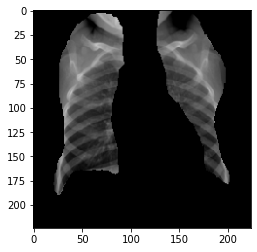

In [98]:
plt.imshow(img_data[100])

In [99]:
img_data.dtype

dtype('int32')

In [100]:
num_classes = 3
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples), dtype = 'int32')

In [101]:
labels[:91] = 0
labels[91:182] = 1
labels[182:] = 2

names = ['Covid-19', 'Normal', 'Pneumonia']

In [102]:
labels.shape

(279,)

In [103]:
Y = np_utils.to_categorical(labels, num_classes)

X_test,Y_test = shuffle(img_data,Y, random_state=2)

## Simple Model

In [ ]:
Model_n = tf.keras.models.load_model("Simple_model.h5")

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred = Model_n.predict(X_test)
y_p = np.argmax(y_pred,axis=1)
y_true = np.argmax(Y_test,axis=1)
print('confusion matrix')
print(confusion_matrix(y_true,y_p))

confusion matrix
[[88  0  3]
 [ 2 85  4]
 [ 6 10 81]]


In [ ]:
print('Classification report')
print(classification_report(y_true,y_p))

Classification report
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        91
           1       0.89      0.93      0.91        91
           2       0.92      0.84      0.88        97

    accuracy                           0.91       279
   macro avg       0.91      0.91      0.91       279
weighted avg       0.91      0.91      0.91       279



ML Techniques

In [ ]:
classifier = tf.keras.models.load_model("Simple_model.h5")

In [ ]:
from tensorflow.keras.models import Model

op_layer = classifier.get_layer('dense_2').output
Model_new = Model(inputs = classifier.input , outputs = op_layer)

In [ ]:
x_test_new,y_test_new = shuffle(img_data,labels, random_state=2)

In [ ]:
test_new_x = Model_new.predict(x_test_new)

svm

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = svm.predict(test_new_x)
y_true = y_test_new
print(confusion_matrix(y_true,y_pred))
print(classification_report(y_true,y_pred))

[[85  1  5]
 [ 2 83  6]
 [ 5  8 84]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93        91
           1       0.90      0.91      0.91        91
           2       0.88      0.87      0.87        97

    accuracy                           0.90       279
   macro avg       0.90      0.90      0.90       279
weighted avg       0.90      0.90      0.90       279



xg_boost

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = xb.predict(test_new_x)
y_true = y_test_new
print(confusion_matrix(y_true,y_pred))
print(classification_report(y_true,y_pred))

[[85  1  5]
 [ 2 82  7]
 [ 5  8 84]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93        91
           1       0.90      0.90      0.90        91
           2       0.88      0.87      0.87        97

    accuracy                           0.90       279
   macro avg       0.90      0.90      0.90       279
weighted avg       0.90      0.90      0.90       279



random_forest

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = rf.predict(test_new_x)
y_true = y_test_new
print(confusion_matrix(y_true,y_pred))
print(classification_report(y_true,y_pred))

[[85  1  5]
 [ 2 83  6]
 [ 5  7 85]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93        91
           1       0.91      0.91      0.91        91
           2       0.89      0.88      0.88        97

    accuracy                           0.91       279
   macro avg       0.91      0.91      0.91       279
weighted avg       0.91      0.91      0.91       279



## Feature Extraction

### SIFT

In [ ]:
! pip install opencv-python==3.4.2.16
! pip install opencv-contrib-python==3.4.2.16

In [ ]:
import cv2

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()
des_list = []

In [ ]:
for i in tqdm(range(len(img_data))):
  img = img_data[i].copy()
  img = np.uint8(img)
  #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  kpts, des = sift.detectAndCompute(img, None)
  des_list.append((i, des))

100%|██████████| 279/279 [00:04<00:00, 56.63it/s]


In [ ]:
image = cv2.drawKeypoints(image=img, outImage=img, keypoints=kpts, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

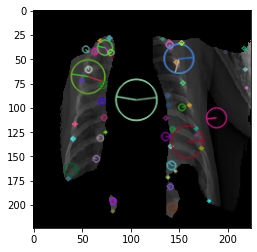

In [ ]:
plt.imshow(image)
plt.show()

In [ ]:
descriptors = des_list[0][1]
for img_no, descriptor in tqdm(des_list[:]):
  try:
    descriptors = np.vstack((descriptors, descriptor))
  except:
    continue

100%|██████████| 279/279 [00:00<00:00, 441.77it/s]


In [ ]:
descriptors_float = descriptors.astype(float)

In [ ]:
from scipy.cluster.vq import kmeans, vq
# we can change the value of k (no of clusters) to see the different accuracies
k = 128
voc, variance = kmeans(descriptors_float, k, 1)

In [ ]:
im_features = np.zeros((len(img_data), k), "float32")
for i in tqdm(range(len(img_data))):
  try:
    words, distance = vq(des_list[i][1],voc)
    for w in words:
      im_features[i][w] += 1
  except:
    continue 

100%|██████████| 279/279 [00:00<00:00, 804.69it/s]


In [ ]:
nbr_occurances = np.sum((im_features > 0) * 1, axis = 0)
idf = np.array(np.log((1.0*len(img_data) + 1) / (1.0*nbr_occurances + 1)), "float32")

In [ ]:
from sklearn.preprocessing import StandardScaler
stdSlr = StandardScaler().fit(im_features)
im_features = stdSlr.transform(im_features)

In [ ]:
im_features.shape

(279, 128)

In [ ]:
im_features.dtype

dtype('float32')

In [ ]:
Model_s = tf.keras.models.load_model("Simple_model.h5")

In [ ]:
from tensorflow.keras.models import Model

op_layer = Model_s.get_layer('dense_2').output
Model_C = Model(inputs = Model_s.input , outputs = op_layer)

In [ ]:
Pred_fc3 = Model_C.predict(img_data)

In [ ]:
total_features = 256
total_dataset = 279

feature_data = np.zeros((total_dataset, total_features), dtype = 'float32')

for i in tqdm(range(len(feature_data))):
  cv_feature = im_features[i]
  model_feature = Pred_fc3[i]
  feature_data[i] = np.concatenate((cv_feature,model_feature))

100%|██████████| 279/279 [00:00<00:00, 144935.70it/s]


In [ ]:
feature_data.shape

(279, 256)

In [ ]:
num_classes = 3
num_of_samples = feature_data.shape[0]
labels = np.ones((num_of_samples), dtype = 'int32')

labels[:91] = 0
labels[91:182] = 1
labels[182:] = 2

names = ['Covid-19', 'Normal', 'Pneumonia']

In [ ]:
Y = np_utils.to_categorical(labels, num_classes)

X_test_SIFT,Y_test_SIFT = shuffle(feature_data,Y, random_state=2)

In [ ]:
Model_n = tf.keras.models.load_model("Simple_model_combined_SIFT.h5")

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred = Model_n.predict(X_test_SIFT)
y_p = np.argmax(y_pred,axis=1)
y_true = np.argmax(Y_test_SIFT,axis=1)
print('confusion matrix')
print(confusion_matrix(y_true,y_p))

confusion matrix
[[86  0  5]
 [ 2 81  8]
 [ 5  8 84]]


In [ ]:
print('Classification report')
print(classification_report(y_true,y_p))

Classification report
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        91
           1       0.91      0.89      0.90        91
           2       0.87      0.87      0.87        97

    accuracy                           0.90       279
   macro avg       0.90      0.90      0.90       279
weighted avg       0.90      0.90      0.90       279



#### ML Techniques

In [ ]:
from tensorflow.keras.models import Model

op_layer = Model_n.get_layer('dense_6').output
Model_csn = Model(inputs = Model_n.input , outputs = op_layer)

In [ ]:
x_new_test,y_new_test = shuffle(feature_data,labels, random_state=2)

In [ ]:
new_test_x = Model_csn.predict(x_new_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

svm

In [ ]:
y_pred = svm.predict(new_test_x)
y_true = y_new_test
print(confusion_matrix(y_true,y_pred))
print(classification_report(y_true,y_pred))

[[84  1  6]
 [ 2 83  6]
 [ 5  8 84]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        91
           1       0.90      0.91      0.91        91
           2       0.88      0.87      0.87        97

    accuracy                           0.90       279
   macro avg       0.90      0.90      0.90       279
weighted avg       0.90      0.90      0.90       279



xg_boost

In [ ]:
y_pred = xb.predict(new_test_x)
y_true = y_new_test
print(confusion_matrix(y_true,y_pred))
print(classification_report(y_true,y_pred))

[[85  1  5]
 [ 2 83  6]
 [ 5  8 84]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93        91
           1       0.90      0.91      0.91        91
           2       0.88      0.87      0.87        97

    accuracy                           0.90       279
   macro avg       0.90      0.90      0.90       279
weighted avg       0.90      0.90      0.90       279



random forest

In [ ]:
y_pred = rf.predict(new_test_x)
y_true = y_new_test
print(confusion_matrix(y_true,y_pred))
print(classification_report(y_true,y_pred))

[[85  1  5]
 [ 2 83  6]
 [ 5  8 84]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93        91
           1       0.90      0.91      0.91        91
           2       0.88      0.87      0.87        97

    accuracy                           0.90       279
   macro avg       0.90      0.90      0.90       279
weighted avg       0.90      0.90      0.90       279



### BRISK

In [104]:
import cv2

In [105]:
brisk = cv2.BRISK_create(50)
des_list = []

In [106]:
for i in tqdm(range(len(img_data))):
  img = img_data[i].copy()
  img = np.uint8(img)
  #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  kpts, des = brisk.detectAndCompute(img, None)
  des_list.append((i, des))




  0%|          | 0/279 [00:00<?, ?it/s]


 10%|▉         | 27/279 [00:00<00:00, 261.18it/s]


 17%|█▋        | 47/279 [00:00<00:00, 237.65it/s]


 26%|██▌       | 73/279 [00:00<00:00, 242.99it/s]


 33%|███▎      | 92/279 [00:00<00:00, 222.49it/s]


 46%|████▌     | 127/279 [00:00<00:00, 249.42it/s]


 58%|█████▊    | 163/279 [00:00<00:00, 274.41it/s]


 72%|███████▏  | 200/279 [00:00<00:00, 297.42it/s]


 85%|████████▍ | 237/279 [00:00<00:00, 314.95it/s]


100%|██████████| 279/279 [00:00<00:00, 301.06it/s]


In [107]:
image = cv2.drawKeypoints(image=img, outImage=img, keypoints=kpts, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

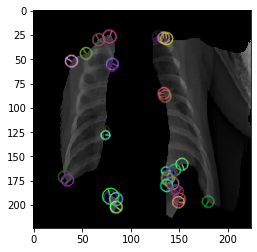

In [108]:
plt.imshow(image)
plt.show()

In [109]:
descriptors = des_list[0][1]
for img_no, descriptor in tqdm(des_list[:]):
  try:
    descriptors = np.vstack((descriptors, descriptor))
  except:
    continue




100%|██████████| 279/279 [00:00<00:00, 5228.45it/s]


In [110]:
descriptors_float = descriptors.astype(float)

In [111]:
from scipy.cluster.vq import kmeans, vq
# we can change the value of k (no of clusters) to see the different accuracies
k = 128
voc, variance = kmeans(descriptors_float, k, 1)

In [112]:
im_features = np.zeros((len(img_data), k), "float32")
for i in tqdm(range(len(img_data))):
  try:
    words, distance = vq(des_list[i][1],voc)
    for w in words:
      im_features[i][w] += 1
  except:
    continue 




  0%|          | 0/279 [00:00<?, ?it/s]


 29%|██▉       | 82/279 [00:00<00:00, 807.49it/s]


100%|██████████| 279/279 [00:00<00:00, 1146.85it/s]


In [113]:
nbr_occurances = np.sum((im_features > 0) * 1, axis = 0)
idf = np.array(np.log((1.0*len(img_data) + 1) / (1.0*nbr_occurances + 1)), "float32")

In [114]:
from sklearn.preprocessing import StandardScaler
stdSlr = StandardScaler().fit(im_features)
im_features = stdSlr.transform(im_features)

In [115]:
im_features.shape

(279, 128)

In [116]:
im_features.dtype

dtype('float32')

In [117]:
Model_s = tf.keras.models.load_model("Simple_model.h5")

In [118]:
from tensorflow.keras.models import Model

op_layer = Model_s.get_layer('dense_2').output
Model_C = Model(inputs = Model_s.input , outputs = op_layer)

In [119]:
Pred_fc3 = Model_C.predict(img_data)

In [120]:
total_features = 256
total_dataset = 279

feature_data = np.zeros((total_dataset, total_features), dtype = 'float32')

for i in tqdm(range(len(feature_data))):
  cv_feature = im_features[i]
  model_feature = Pred_fc3[i]
  feature_data[i] = np.concatenate((cv_feature,model_feature))




100%|██████████| 279/279 [00:00<00:00, 236980.72it/s]


In [121]:
feature_data.shape

(279, 256)

In [122]:
num_classes = 3
num_of_samples = feature_data.shape[0]
labels = np.ones((num_of_samples), dtype = 'int32')

labels[:91] = 0
labels[91:182] = 1
labels[182:] = 2

names = ['Covid-19', 'Normal', 'Pneumonia']

In [123]:
Y = np_utils.to_categorical(labels, num_classes)

X_test_SIFT,Y_test_SIFT = shuffle(feature_data,Y, random_state=2)

In [124]:
Model_n = tf.keras.models.load_model("Simple_model_combined_BRISK.h5")

In [125]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred = Model_n.predict(X_test_SIFT)
y_p = np.argmax(y_pred,axis=1)
y_true = np.argmax(Y_test_SIFT,axis=1)
print('confusion matrix')
print(confusion_matrix(y_true,y_p))

confusion matrix
[[88  0  3]
 [ 1 80 10]
 [ 4  4 89]]


In [126]:
print('Classification report')
print(classification_report(y_true,y_p))

Classification report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        91
           1       0.95      0.88      0.91        91
           2       0.87      0.92      0.89        97

    accuracy                           0.92       279
   macro avg       0.92      0.92      0.92       279
weighted avg       0.92      0.92      0.92       279



#### ML Techniques

In [127]:
from tensorflow.keras.models import Model

op_layer = Model_n.get_layer('dense_6').output
Model_csn = Model(inputs = Model_n.input , outputs = op_layer)

In [128]:
x_new_test,y_new_test = shuffle(feature_data,labels, random_state=2)

In [129]:
new_test_x = Model_csn.predict(x_new_test)

In [130]:
from sklearn.metrics import confusion_matrix, classification_report

svm

In [131]:
y_pred = svm.predict(new_test_x)
y_true = y_new_test
print(confusion_matrix(y_true,y_pred))
print(classification_report(y_true,y_pred))

[[88  0  3]
 [ 1 81  9]
 [ 3  4 90]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        91
           1       0.95      0.89      0.92        91
           2       0.88      0.93      0.90        97

    accuracy                           0.93       279
   macro avg       0.93      0.93      0.93       279
weighted avg       0.93      0.93      0.93       279



xg_boost

In [132]:
y_pred = xb.predict(new_test_x)
y_true = y_new_test
print(confusion_matrix(y_true,y_pred))
print(classification_report(y_true,y_pred))

[[88  0  3]
 [ 1 82  8]
 [ 3  4 90]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        91
           1       0.95      0.90      0.93        91
           2       0.89      0.93      0.91        97

    accuracy                           0.93       279
   macro avg       0.93      0.93      0.93       279
weighted avg       0.93      0.93      0.93       279



random forest

In [133]:
y_pred = rf.predict(new_test_x)
y_true = y_new_test
print(confusion_matrix(y_true,y_pred))
print(classification_report(y_true,y_pred))

[[88  0  3]
 [ 1 82  8]
 [ 3  4 90]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        91
           1       0.95      0.90      0.93        91
           2       0.89      0.93      0.91        97

    accuracy                           0.93       279
   macro avg       0.93      0.93      0.93       279
weighted avg       0.93      0.93      0.93       279

